# Data Cleaning

**Important Note:** The slides in the deck have modified versions of the dataset to illustrate and provide examples for various errors to clean. The real dataset for this project may not have the same errors, so don't expect to find the exact same observations as in the slides.

In [2]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# import the dataset
df = pd.read_csv('real_estate.csv')
df.head(2)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
0,295850,2013,234,81,1,1,584,2013,0,NaN,Condo
1,216500,2006,169,51,1,1,612,1965,0,1.0,Condo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1883 non-null   int64  
 1   year_sold      1883 non-null   int64  
 2   property_tax   1883 non-null   int64  
 3   insurance      1883 non-null   int64  
 4   beds           1883 non-null   int64  
 5   baths          1883 non-null   int64  
 6   sqft           1883 non-null   int64  
 7   year_built     1883 non-null   int64  
 8   lot_size       1883 non-null   int64  
 9   basement       1657 non-null   float64
 10  property_type  1883 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 161.9+ KB


#### Now let's get started with cleaning the data!

The first step to data cleaning is removing records from your dataset that you don't want to include in the model. This includes **duplicate observations** and **irrelevant observations.**

## I. Drop Unwanted Observations

**Duplicate observations are repeating observations.**
* They occur when combining multiple datasets, scraping data, or collecting data from different clients.

* Dropping duplicates is easy using Pandas's built-in `drop_duplicates()` function.

In [5]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(1883, 11)
(1883, 11)


#### Were there any duplicates?

## II. Fix Structural Errors

* Structural errors are those that arise during measurement, data transfer, etc.
* For example, the `basement` feature? It has values **1** and **NaN**.

In [6]:
# Display unique values of 'basement'
print(df.basement.unique())

[nan  1.]


The **NaN** values are missing values. They actually indicate that the property does not have a `basement`. Therefore, let's replace them with the value **0**.

Using the `.fillna()` function replace **NaN** values with 0. 

In [7]:
# Replace missing basement values to 0
# inplace=True updates the values in the original DataFrame.
df.basement.fillna(0, inplace=True)

In [8]:
# Display unique values of 'basement'
print(df.basement.unique())

[0. 1.]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1883 non-null   int64  
 1   year_sold      1883 non-null   int64  
 2   property_tax   1883 non-null   int64  
 3   insurance      1883 non-null   int64  
 4   beds           1883 non-null   int64  
 5   baths          1883 non-null   int64  
 6   sqft           1883 non-null   int64  
 7   year_built     1883 non-null   int64  
 8   lot_size       1883 non-null   int64  
 9   basement       1883 non-null   float64
 10  property_type  1883 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 161.9+ KB


## II. Remove "Guilty" Outliers

Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models. If you have a good reason to remove an outlier, it will help your model's performance.

#### A. Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

In [10]:
import warnings
warnings.filterwarnings('ignore')

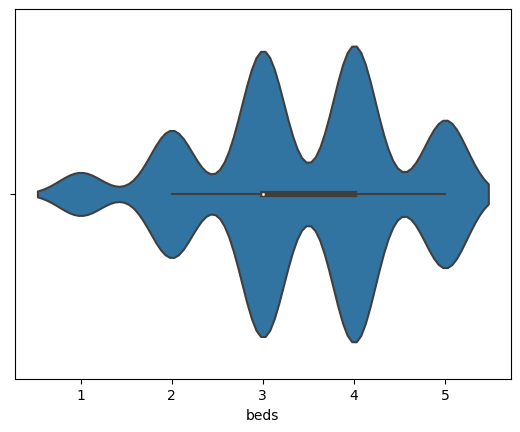

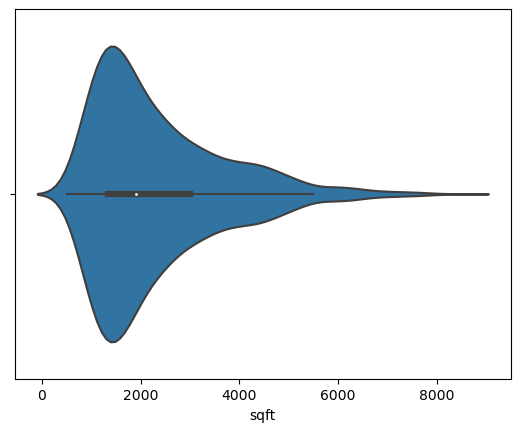

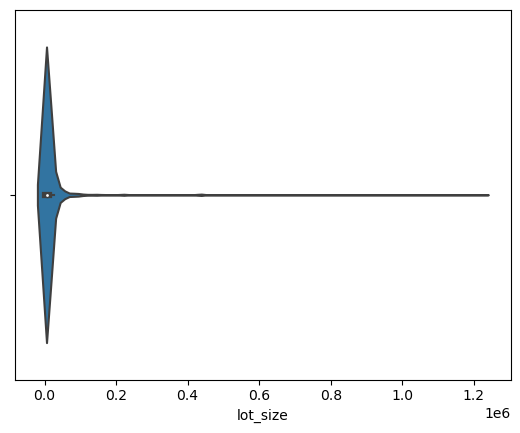

In [11]:
# Violin plot of beds
sns.violinplot(x=df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(x=df.sqft)
plt.show()


# Violin plot of lot_size
sns.violinplot(x=df.lot_size)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B. Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [12]:
# Print top 5 homes with largest lot_size
df.lot_size.sort_values(ascending=False).head(20)

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
1817     435600
1115     435600
1570     435600
1852     351529
1479     343252
682      260488
1705     231303
1878     224334
1837     217800
1578     217800
1486     217800
1880     217800
172      183387
1843     175111
696      160736
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

#### C. Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be an outlier? Why?**

In [13]:
# print the record where lot_size = 1220551
df[df['lot_size']== 1220551]

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
102,292999,2014,230,79,2,1,875,1950,1220551,0.0,Condo


#### D.) Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [17]:
# check df shape before
print(df.shape)

# Remove records with lot_size > 500,000
df=df[df['lot_size'] <= 500000]

# check df shape after
print(df.shape)

(1883, 11)
(1882, 11)


## Save the Cleaned Dataset

#### Finally, save the cleaned dataframe as  <code style="color:steelblue">'cleaned_df.csv'</code>

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [18]:
# Save the cleaned dataset
df.to_csv('cleaned_df.csv')


We will use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!
In the next module, **Feature Engineering**, you'll use the cleaned dataset to create new features that will improve model performance.